In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cepheids_raw = pd.read_csv('cepheidData.csv')

#Added this to be transparent about how I calculated absMag, and in case we need to switch bands for whatever reason
def magconvert(appMag, parallax):
    absMag = appMag+5*np.log10(parallax)-10
    return absMag


cepheids_raw['absMag'] = magconvert(cepheids_raw.int_average_rp, cepheids_raw.parallax)

#Calculate absMag error using propagation of errors from 3700
def propError(w, sigmam, sigmaw):
    wcoeff = (2.171/w)**2
    sigmaM = np.sqrt(sigmam**2+wcoeff*sigmaw**2)
    return sigmaM

cepheids_raw['absMag_error'] = propError(cepheids_raw.parallax, cepheids_raw.int_average_rp_error, cepheids_raw.parallax_error)
cepheids_raw['log_pf'] = np.log10(cepheids_raw.pf)
cepheids_raw['log_pf_error'] = cepheids_raw.pf_error/(cepheids_raw.pf*2.3026) #This is also using propagation of errors (mostly just to show how small the x errors are)

cepheids_raw

/Users/brigid/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification,absMag_error,log_pf,log_pf_error
0,0,0.007955,0.054861,14.653433,0.003739,16.111423,0.006698,16.698946,0.024877,15.325538,0.014622,-5.171356,DCEP,14.972697,1.165939,0.000111
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP,0.106197,1.598072,0.000977
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP,0.059172,0.810467,0.000013
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP,0.443548,0.325060,0.000022
4,4,0.219112,0.020837,NaN,NaN,13.930612,0.001861,14.570040,0.001326,13.142683,0.001473,-0.153982,DCEP,0.206463,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,0.067521,0.036115,NaN,NaN,15.232883,0.003770,15.542849,0.007480,14.742361,0.003556,-1.110456,DCEP,1.161207,NaN,NaN
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP,2.800753,0.039240,0.000004
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP,1.188574,1.556502,0.000905
14998,14998,0.060838,0.033948,NaN,NaN,15.298103,0.000806,15.689356,0.011910,14.699787,0.008001,-1.379335,DCEP,1.211449,NaN,NaN


In [3]:
# First I'll filter out any very dim or very distant stars.
# After looking it up, the general consensus is that stars with M ~8 or lower are reliable.
# Also, ~100 lightyears is the maximum distance for accurate usage of parallax. 
# So I'll go ahead and filter those out.

# Parallax equation is d = 1/p where d is in parsecs. 
# One parsec is 3.26 light years.
# So our equations to find the maximum become:

distance = 100 / 3.26
parallax_val = 1 / distance

# Now we filter them.

cepheids_filtered_mag = cepheids_raw[cepheids_raw['absMag'] <= 8] 
ceph_nan_filter = cepheids_filtered_mag[~np.isnan(cepheids_filtered_mag['log_pf'])]
cepheids_final = ceph_nan_filter[ceph_nan_filter['parallax'] >= parallax_val]


cepheids_final

,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification,absMag_error,log_pf,log_pf_error
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP,0.106197,1.598072,0.000977
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP,0.059172,0.810467,0.000013
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP,0.443548,0.325060,0.000022
5,5,0.085476,0.024270,1.668081,0.000060,14.593651,0.009135,15.271548,0.011074,13.772953,0.009983,-1.567836,DCEP,0.616526,0.222217,0.000016
7,7,0.164770,0.026044,4.248021,0.000034,14.400724,0.001923,15.699780,0.002789,13.274722,0.002050,-0.640890,DCEP,0.343163,0.628187,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,14993,0.091633,0.051199,1.172823,0.000010,16.192015,0.028820,16.302158,0.100734,15.691511,0.075271,0.501760,T2CEP,1.215370,0.069232,0.000004
14994,14994,0.051999,0.023266,1.793977,0.000041,13.852269,0.007103,14.100911,0.016380,13.404150,0.013638,-3.015872,DCEP,0.971471,0.253817,0.000010
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP,2.800753,0.039240,0.000004
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP,1.188574,1.556502,0.000905


In [4]:
# Now to add a luminosity column to use in graphing. 

sun_mag = 4.83
cepheids_final['lum'] = 10**((sun_mag - cepheids_final['absMag'])/2.5)
cepheids_final

/var/folders/l5/zs7f0lx525b0jl3ctgsmn9mc0000gn/T/ipykernel_7301/93703208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cepheids_final['lum'] = 10**((sun_mag - cepheids_final['absMag'])/2.5)


,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification,absMag_error,log_pf,log_pf_error,lum
1,1,0.760315,0.036303,39.634363,0.089153,8.989317,0.039879,9.940293,0.041236,7.947983,0.023081,-2.647050,T2CEP,0.106197,1.598072,0.000977,979.084247
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP,0.059172,0.810467,0.000013,2363.854367
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP,0.443548,0.325060,0.000022,452.744242
5,5,0.085476,0.024270,1.668081,0.000060,14.593651,0.009135,15.271548,0.011074,13.772953,0.009983,-1.567836,DCEP,0.616526,0.222217,0.000016,362.354960
7,7,0.164770,0.026044,4.248021,0.000034,14.400724,0.001923,15.699780,0.002789,13.274722,0.002050,-0.640890,DCEP,0.343163,0.628187,0.000003,154.296471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,14993,0.091633,0.051199,1.172823,0.000010,16.192015,0.028820,16.302158,0.100734,15.691511,0.075271,0.501760,T2CEP,1.215370,0.069232,0.000004,53.863701
14994,14994,0.051999,0.023266,1.793977,0.000041,13.852269,0.007103,14.100911,0.016380,13.404150,0.013638,-3.015872,DCEP,0.971471,0.253817,0.000010,1375.145510
14996,14996,0.060021,0.077426,1.094561,0.000010,17.214725,0.013331,17.571655,0.031099,16.877434,0.035095,0.768957,T2CEP,2.800753,0.039240,0.000004,42.113089
14997,14997,0.055812,0.030554,36.016513,0.075024,14.452858,0.019295,14.979938,0.016756,13.776208,0.013809,-2.490171,T2CEP,1.188574,1.556502,0.000905,847.360579


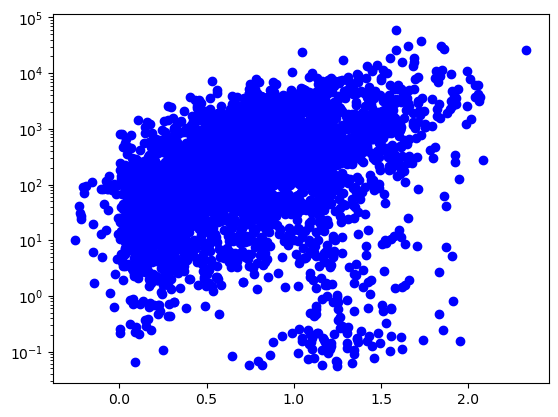

In [5]:
plt.scatter(cepheids_final['log_pf'], cepheids_final['lum'], marker ='o', color='b', label='Magnitude')
#plt.xscale('log')
plt.yscale('log')

,Unnamed: 0,parallax,parallax_error,pf,pf_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,absMag,type_best_classification,absMag_error,log_pf,log_pf_error,lum
2,2,1.056616,0.028702,6.463492,0.000198,7.056958,0.003812,7.693439,0.004636,6.276362,0.004852,-3.604052,DCEP,0.059172,0.810467,0.000013,2363.854367
3,3,0.111414,0.022759,2.113783,0.000105,13.584487,0.007965,14.032928,0.008836,12.955661,0.008376,-1.809632,DCEP,0.443548,0.325060,0.000022,452.744242
7,7,0.164770,0.026044,4.248021,0.000034,14.400724,0.001923,15.699780,0.002789,13.274722,0.002050,-0.640890,DCEP,0.343163,0.628187,0.000003,154.296471
12,12,0.090646,0.018350,4.910688,0.000104,13.082152,0.001845,14.052019,0.002131,12.100955,0.001443,-3.112313,DCEP,0.439482,0.691142,0.000009,1502.883590
14,14,0.193220,0.015612,18.193719,0.001061,9.757313,0.008129,10.619331,0.008232,8.850902,0.004562,-4.718835,DCEP,0.175475,1.259921,0.000025,6599.846328


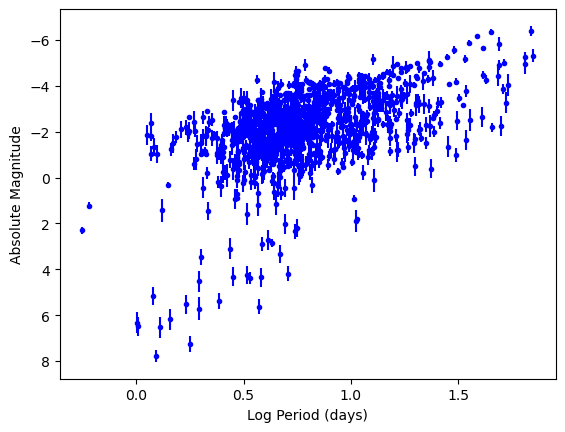

In [6]:
# It's not a very clear example of where linear regression would show on the graph. Maybe include less values?


#Literature uses Mv in the luminosity-period relation, so I did the fitting to magnitude. Gaia doesn't actually give V-band data so idk? Just rolling with rp for now since it seems like it has the lowest spread.
cephFilter = cepheids_final.query('absMag_error < 0.5 and type_best_classification == "DCEP"') #Messing with this can pretty significantly change the result. There are apparently different types of cepheids, but DCEP is the normal kind. 
#Lowering the uncertainty cut bring the slope closer to the agreed upon value of 2.76 (https://academic.oup.com/mnras/article/308/4/969/1030435). I think the intercept is off a bit though (not sure how much that really matters)

#plot with error bars
fig, ax = plt.subplots()
ax.errorbar(cephFilter['log_pf'], cephFilter['absMag'], yerr=cephFilter['absMag_error'], xerr=cephFilter['log_pf_error'], fmt='.', color='b', label='Magnitude')
ax.invert_yaxis()
ax.set_xlabel("Log Period (days)")
ax.set_ylabel("Absolute Magnitude")

#80-20 train-test split
index = int(len(cephFilter)*0.8)

traindata = cephFilter[:index]
testdata = cephFilter[index:]

traindata.head()
#There's some outliers hanging out at dim magnitudes, we could probably just cut those out?

[-0.41127382 -2.70734905]
[[ 0.00175029 -0.00200618]
 [-0.00200618  0.00255088]]


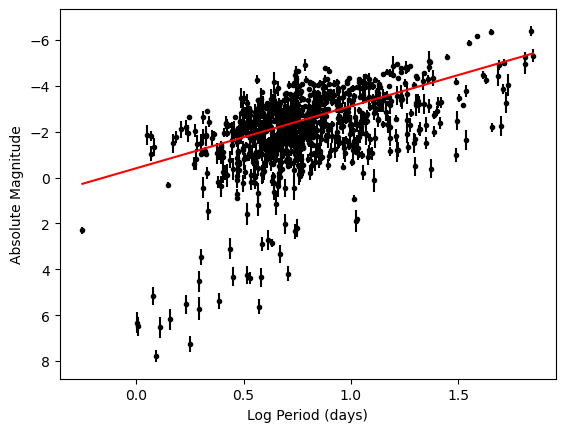

In [7]:
#Doing linear regression formula from lecture slides
Phi = np.column_stack((np.ones(index), np.log10(traindata.pf)))
#print(Phi)
S_inv = np.diag(1/traindata.absMag_error)
t = traindata.absMag

w_ml = np.linalg.inv(Phi.T @ S_inv @ Phi) @ Phi.T @ S_inv @ t
Sigma = np.linalg.inv(Phi.T @ S_inv @ Phi)
print(w_ml) # [intercept, slope]
print(Sigma) #I forget how to get uncertainties out of this :/. I think its just the diagonal entries?


#Plot the results
x = np.linspace(min(traindata.log_pf), max(traindata.log_pf))
y = w_ml[0] + x*w_ml[1]

fig, ax = plt.subplots()
ax.errorbar(traindata['log_pf'], traindata['absMag'], yerr=traindata['absMag_error'], xerr=traindata['log_pf_error'], fmt='.', color='k', label='Magnitude')
ax.plot(x, y, color='red', zorder=1000)
ax.set_xlabel("Log Period (days)")
ax.set_ylabel("Absolute Magnitude")
ax.invert_yaxis()

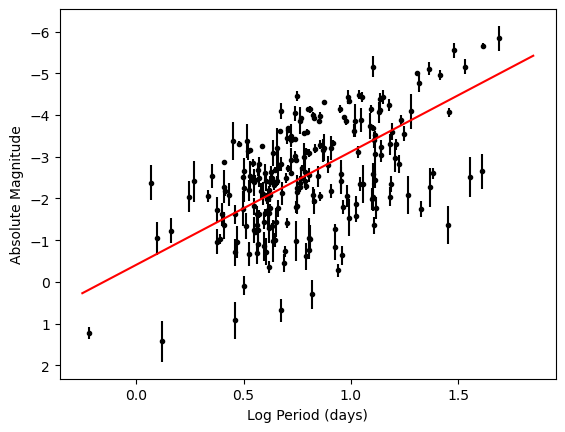

In [8]:
#Plot testing data
fig, ax = plt.subplots()
ax.errorbar(testdata['log_pf'], testdata['absMag'], yerr=testdata['absMag_error'], xerr=testdata['log_pf_error'], fmt='.', color='k', label='Magnitude')
ax.plot(x, y, color='red', zorder=1000)
ax.set_xlabel("Log Period (days)")
ax.set_ylabel("Absolute Magnitude")
ax.invert_yaxis()

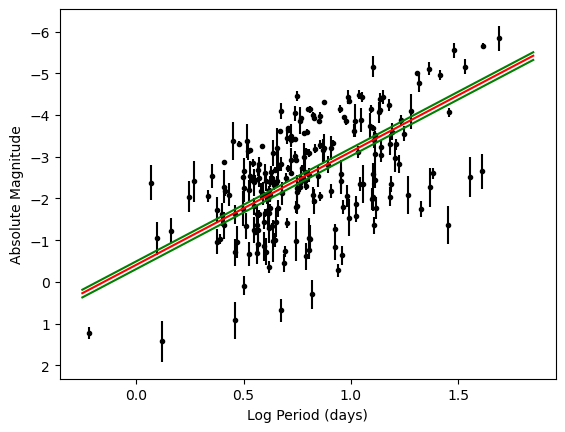

In [9]:
lower = 0.00175029 ** (1/2) * 2
upper = 0.00255088 ** (1/2) * 2

#Plot testing data
y_upper = w_ml[0] + upper + x*w_ml[1]
y_lower = w_ml[0] - lower + x*w_ml[1]

#Plot testing data
fig, ax = plt.subplots()
ax.errorbar(testdata['log_pf'], testdata['absMag'], yerr=testdata['absMag_error'], xerr=testdata['log_pf_error'], fmt='.', color='k', label='Magnitude')
ax.plot(x, y, color='red', zorder=1000)
ax.plot(x, y_upper, color='green', zorder=1000)
ax.plot(x, y_lower, color='green', zorder=1000)
ax.set_xlabel("Log Period (days)")
ax.set_ylabel("Absolute Magnitude")
ax.invert_yaxis()